## CHECK VERSIONS

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("NumPy", np.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
NumPy 1.16.4
SciPy 1.2.1
Scikit-Learn 0.21.2


In [2]:

def OneHotEncode(x,classAmount):
    
    from numpy import argmax
    # integer encode input data
    integer_encoded = list(np.floor(x).astype(int))
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        temp = [0 for _ in range(classAmount)]
        temp[value] = 1
        onehot_encoded.append(temp)
    return np.array(onehot_encoded)
# invert encoding


## LOAD DATA (TRAINNING)

In [3]:


root ="Dataset/"

datafile = root +"data"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"
targetfile = root +"target"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"

InsampleloadTarget = np.load(targetfile) # load
InsampleloadData = np.load(datafile) #

X=InsampleloadData
y=InsampleloadTarget


AAA = list(y).count(0.000)
HHH = list(y).count(1.000)
CCC = list(y).count(2.000)
VVV = list(y).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",X.shape)
print ("Final Target Extracted Shape",y.shape)

24534 Data
4878 samples 0-Ambience  19 %
8694 samples 1-Hatchet  35 %
7479 samples 2-Chainsaw  30 %
3483 samples 3-Vehicle  14 %
Final Data Extracted Shape (24534, 98, 40)
Final Target Extracted Shape (24534,)


## LOAD DATA (TESTING)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np 

root ="C:/Users/Another/CNN/Batch Trainning/Dataset/"

datafile = root +"data"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"
targetfile = root +"target"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"

OutloadTarget = np.load(targetfile) # load
OutloadData = np.load(datafile) #
X_out = OutloadData
y_out = OutloadTarget

XX = OutloadData
yy = OutloadTarget

AAA = list(yy).count(0.000)
HHH = list(yy).count(1.000)
CCC = list(yy).count(2.000)
VVV = list(yy).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",XX.shape)
print ("Final Target Extracted Shape",yy.shape)

7258 Data
1330 samples 0-Ambience  18 %
2622 samples 1-Hatchet  36 %
1311 samples 2-Chainsaw  18 %
1995 samples 3-Vehicle  27 %
Final Data Extracted Shape (7258, 98, 40)
Final Target Extracted Shape (7258,)


In [5]:
def flattenFeature(x):
    flats = []
    print(len(x))
    for i in range(len(x)):
        flat = np.ndarray.flatten(x[i,:,:])
        flats.append(flat)
    return np.array(flats)


In [6]:
X = flattenFeature(X)
print('Training Features Shape:', X.shape)

XX = flattenFeature(XX)
print('Testing Features Shape:', XX.shape)

24534
Training Features Shape: (24534, 3920)
7258
Testing Features Shape: (7258, 3920)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify = y)

print(len(X_train))


X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(XX, yy, test_size=0.99, random_state=42, stratify = yy)

print(len(X_test_out))

24288
7186


In [12]:


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
from sklearn import metrics

y_pred=clf.predict(X_test_out)
# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(y_pred, y_test_out))


Accuracy: 0.7177845811299749


## Confusion Matrix

In [58]:

##DECODE BINARY TARGET TO NUMERIC TARGET 0 1 0 0 TO 2###
def decode(datum):
    return np.argmax(datum)


def decodeRows(encoded_data):
    temp = []
    for i in range(encoded_data.shape[0]):
        datum = encoded_data[i]
        #print('index: %d' % i)
        #print('encoded datum: %s' % datum)
        decoded_datum = decode(encoded_data[i])
        temp.append(decoded_datum)
    return np.array(temp)
    #print('decoded datum: %s' % decoded_datum)
    #print()

from sklearn.metrics import roc_auc_score

# Calculate roc auc
Py_pred = clf.predict_proba(X_test_out)
print(Py_pred)
y_testHOT = OneHotEncode(y_test_out,4)
roc_value = roc_auc_score(y_testHOT, Py_pred)

print(roc_value)

[[0.04 0.12 0.5  0.34]
 [0.   0.03 0.   0.97]
 [0.   0.   0.04 0.96]
 ...
 [0.55 0.31 0.02 0.12]
 [0.   0.92 0.01 0.07]
 [0.01 0.03 0.93 0.03]]
0.9241461868659615


F1 Score:  0.7085492766128139
Precision Score:  0.7134294838926847
Recall Score:  0.7174596777627218


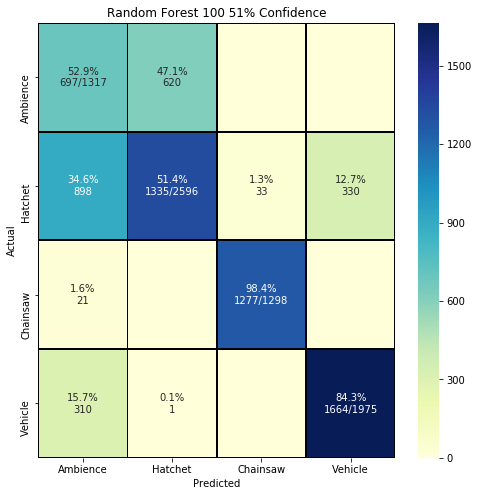

F1 Score:  0.7086285088580041
Precision Score:  0.7162478154454919
Recall Score:  0.7170162107918311


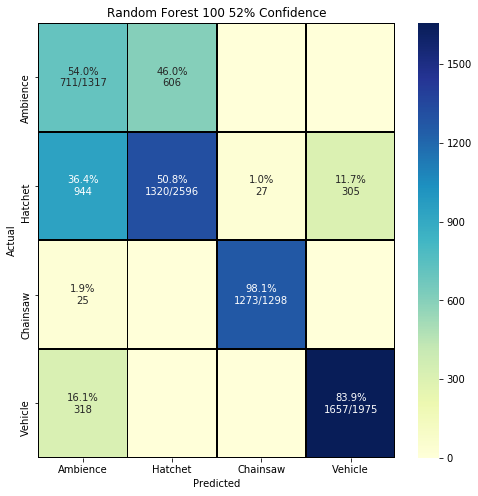

F1 Score:  0.7080960515688495
Precision Score:  0.7189347397807238
Recall Score:  0.7156316646117649


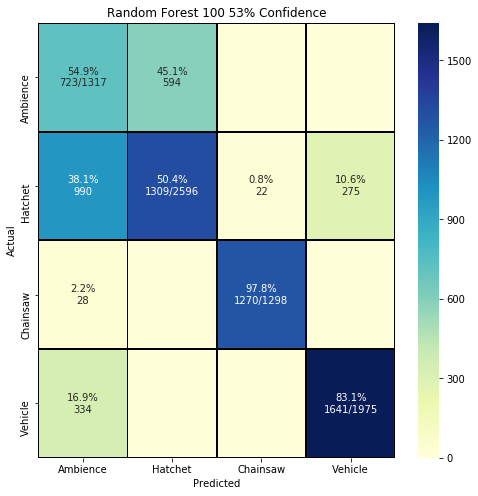

F1 Score:  0.7081498326410629
Precision Score:  0.7220784086943548
Recall Score:  0.7150066121025846


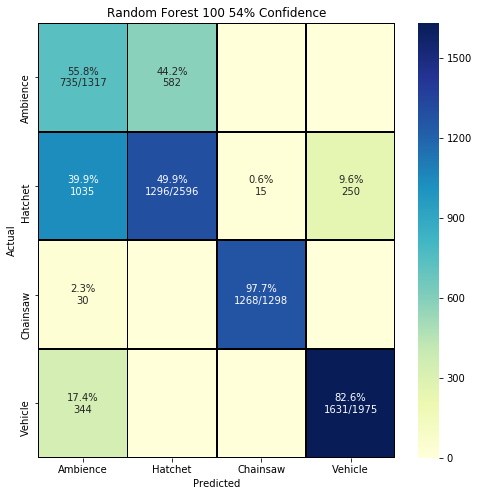

F1 Score:  0.7073192219889162
Precision Score:  0.7240224620398612
Recall Score:  0.7134874360498719


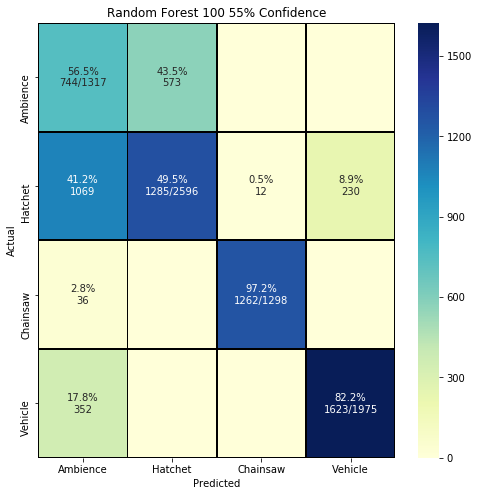

F1 Score:  0.7072458681779727
Precision Score:  0.7276063202901424
Recall Score:  0.7126944064048308


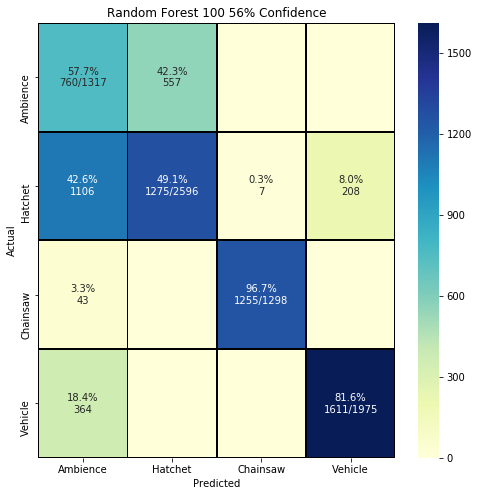

F1 Score:  0.7064704411137459
Precision Score:  0.7303547316135679
Recall Score:  0.711197174691032


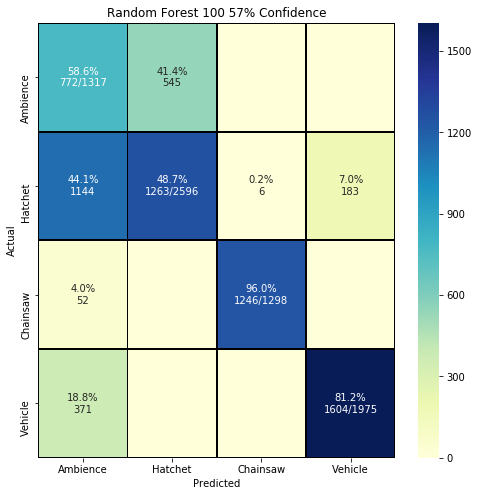

F1 Score:  0.7068449698986818
Precision Score:  0.7341425847140044
Recall Score:  0.7113836482388378


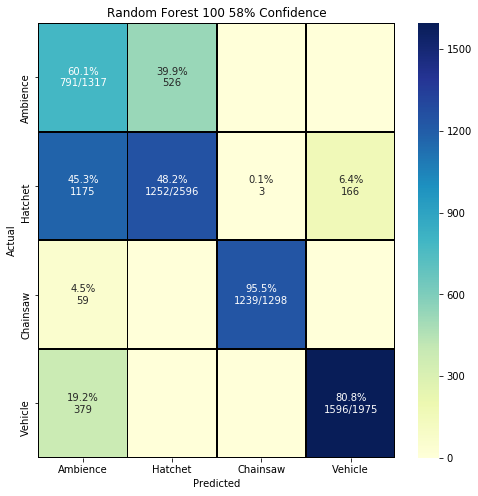

F1 Score:  0.7059895690711524
Precision Score:  0.7368411714962397
Recall Score:  0.7106125629327106


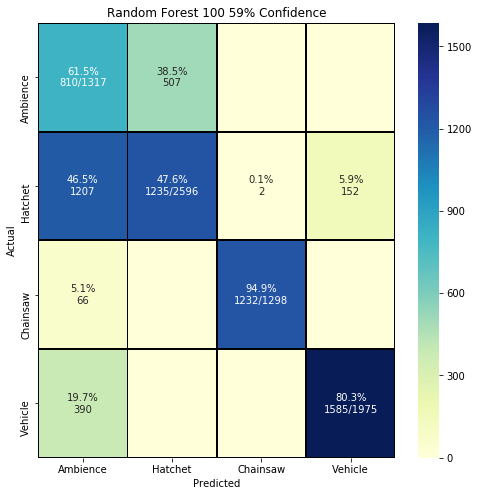

F1 Score:  0.7047075324970614
Precision Score:  0.7387327632448591
Recall Score:  0.7086723413012816


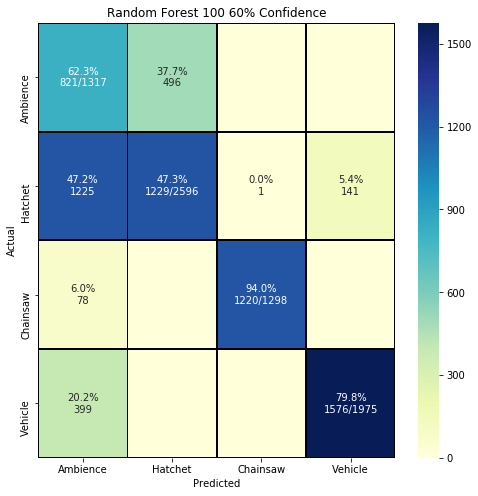

F1 Score:  0.7043616704584131
Precision Score:  0.7414898501923128
Recall Score:  0.7084763854822559


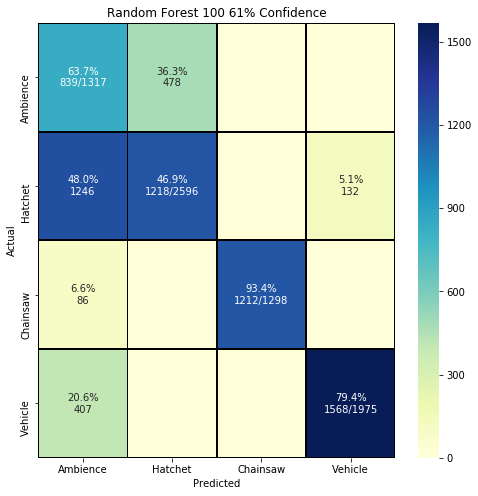

F1 Score:  0.703456348700503
Precision Score:  0.7444352754328987
Recall Score:  0.7078730850837763


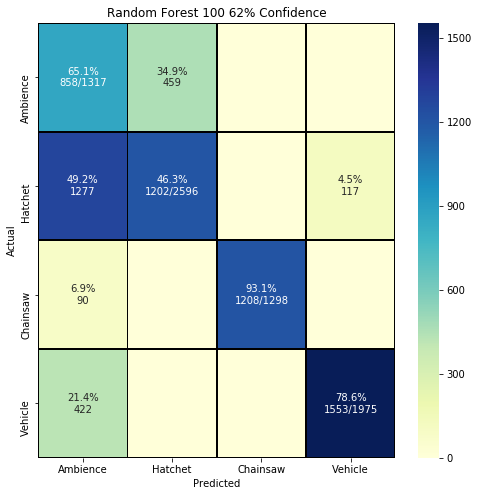

F1 Score:  0.7019439950767217
Precision Score:  0.7466172875898948
Recall Score:  0.7064168637709308


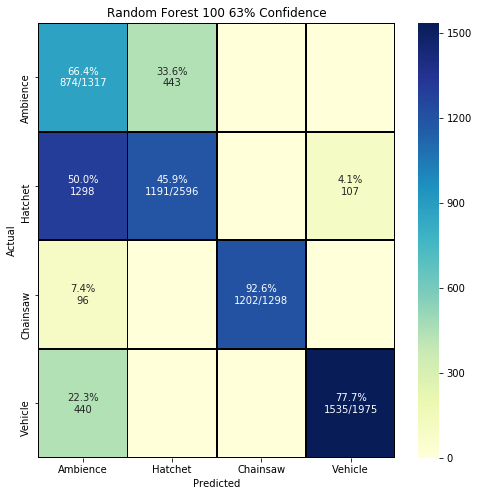

F1 Score:  0.6994758608490963
Precision Score:  0.7495623905155189
Recall Score:  0.7038875233108179


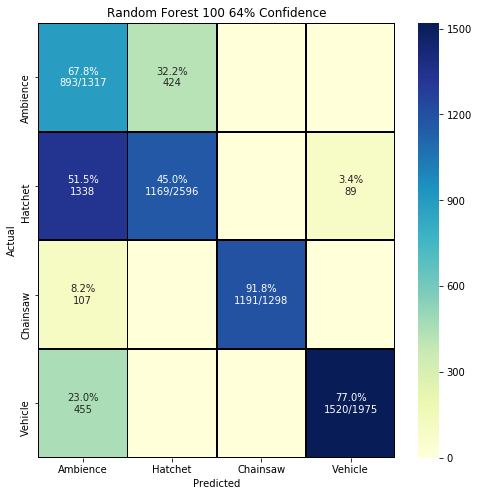

F1 Score:  0.697352303379938
Precision Score:  0.751873507581071
Recall Score:  0.7017544093309056


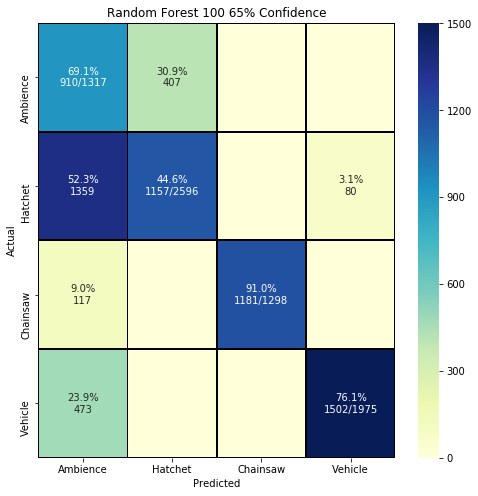

F1 Score:  0.6931907718727217
Precision Score:  0.7526780113941165
Recall Score:  0.6975411713809747


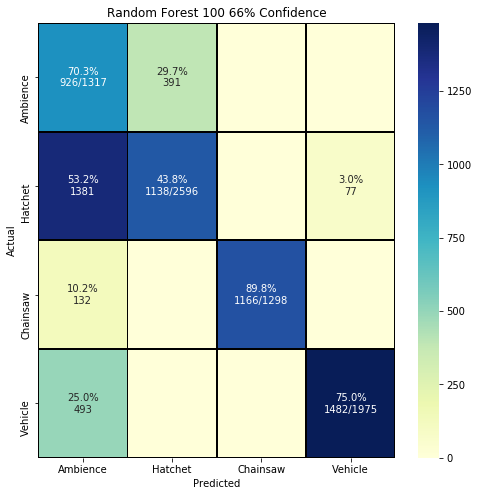

F1 Score:  0.6886883898092806
Precision Score:  0.7535149266216543
Recall Score:  0.6922523204633286


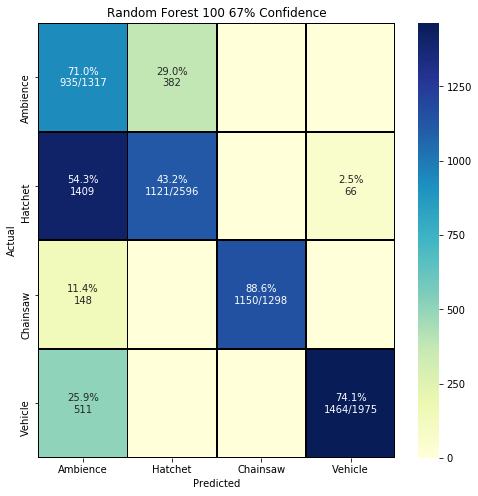

F1 Score:  0.684923831717586
Precision Score:  0.7552704765053585
Recall Score:  0.6886029977871393


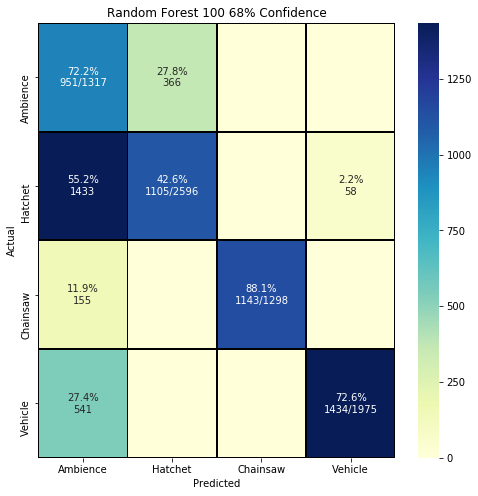

F1 Score:  0.6794858842030895
Precision Score:  0.7567139335713395
Recall Score:  0.6829367942231187


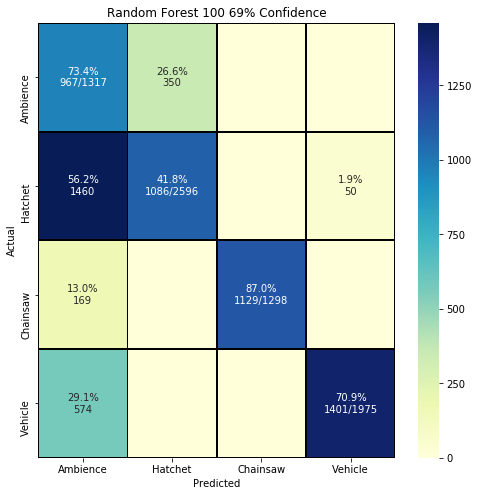

F1 Score:  0.6738697292655296
Precision Score:  0.7580598628475184
Recall Score:  0.6770780827670413


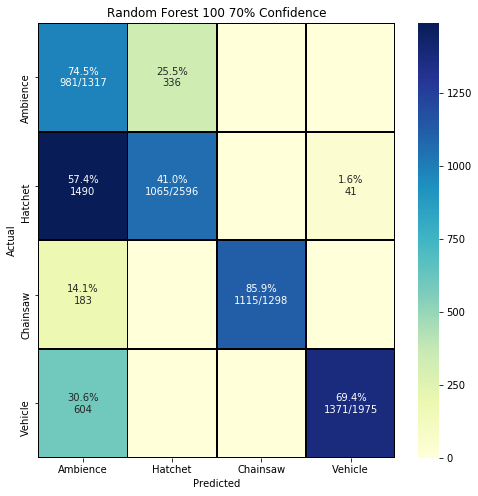

F1 Score:  0.6678639275130098
Precision Score:  0.7588995270017868
Recall Score:  0.6710240847734121


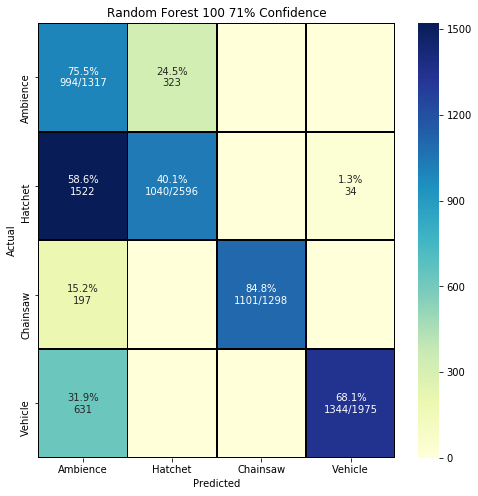

F1 Score:  0.6625450644389794
Precision Score:  0.7601110588634835
Recall Score:  0.6658891255359379


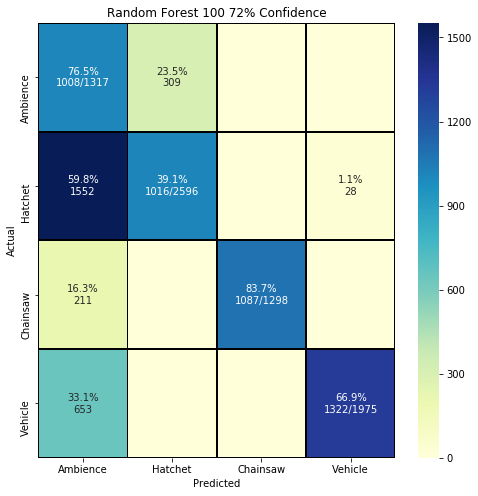

F1 Score:  0.6537953749909514
Precision Score:  0.759686983107025
Recall Score:  0.6572871945561445


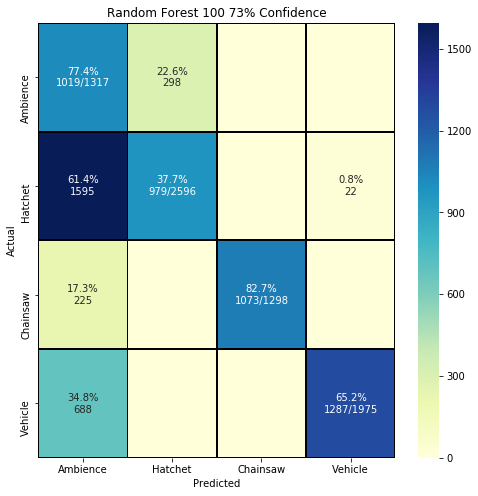

F1 Score:  0.6474339646775669
Precision Score:  0.7597960074476541
Recall Score:  0.6504739912339492


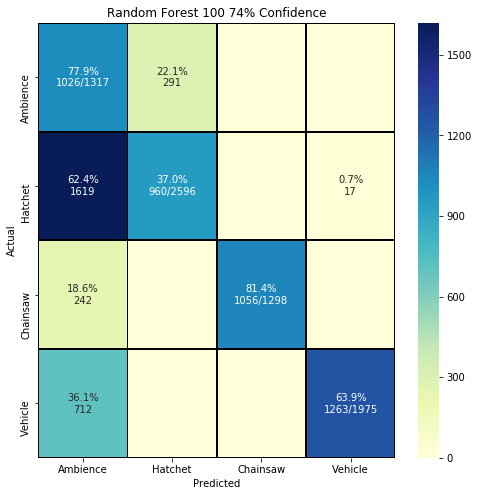

F1 Score:  0.6395067798025604
Precision Score:  0.7597512160681545
Recall Score:  0.6422573643805889


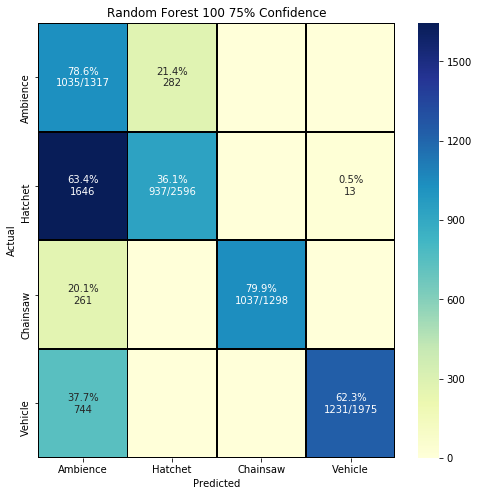

F1 Score:  0.6323367472521679
Precision Score:  0.7596020093238098
Recall Score:  0.6348030098436099


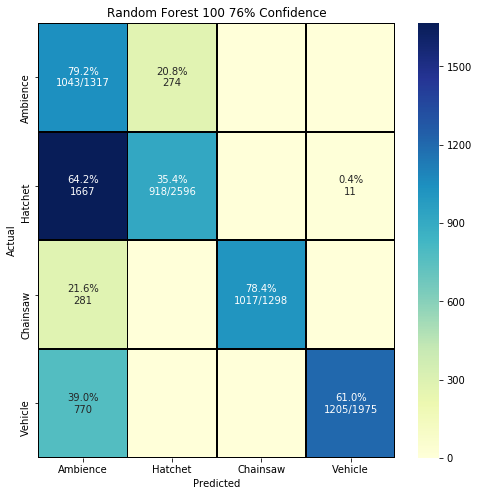

F1 Score:  0.622614494189933
Precision Score:  0.7588316835498018
Recall Score:  0.6250730525708472


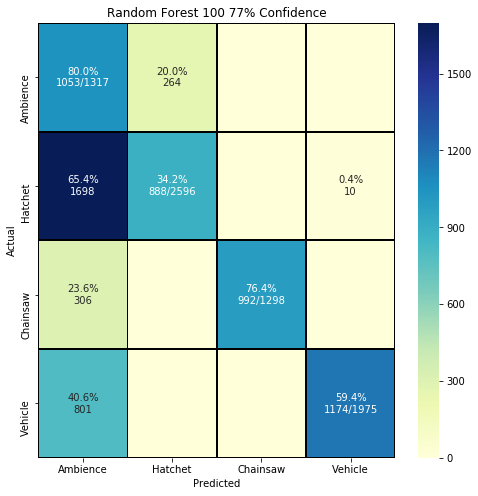

F1 Score:  0.6134395415418781
Precision Score:  0.7580476833461635
Recall Score:  0.6160887883383288


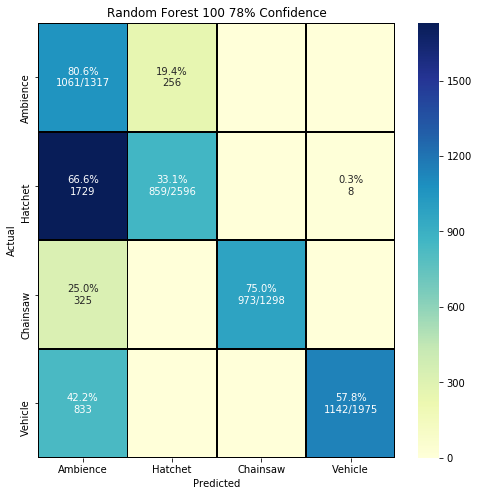

F1 Score:  0.6050442619002372
Precision Score:  0.757707973161255
Recall Score:  0.6077208562220785


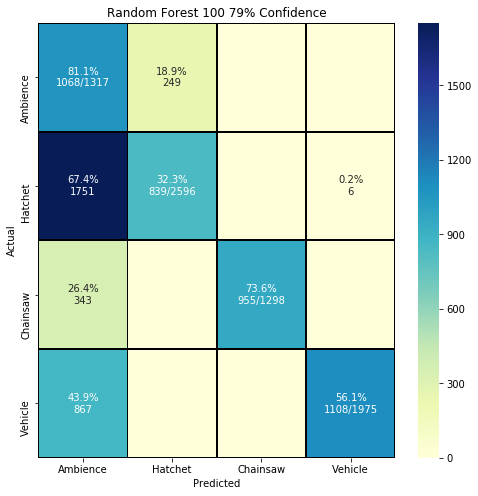

F1 Score:  0.5969740286170964
Precision Score:  0.7587865574749939
Recall Score:  0.6004285370735435


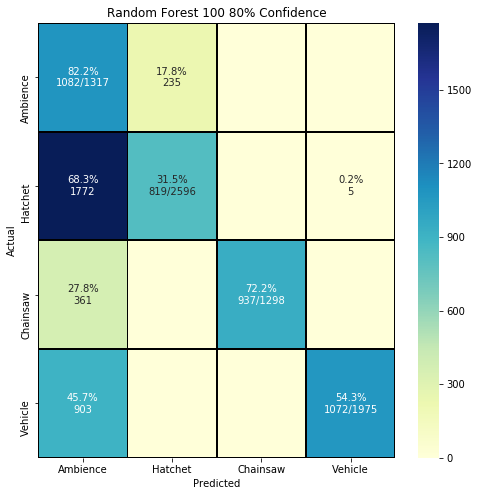

F1 Score:  0.5856219742811474
Precision Score:  0.7595009168210802
Recall Score:  0.5899636168860904


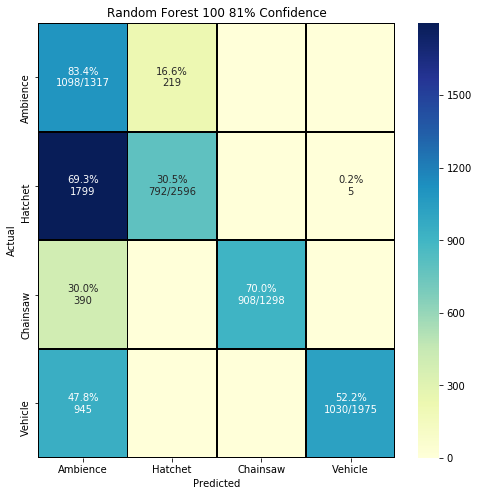

F1 Score:  0.572187941832381
Precision Score:  0.7597483175462262
Recall Score:  0.5771957845611629


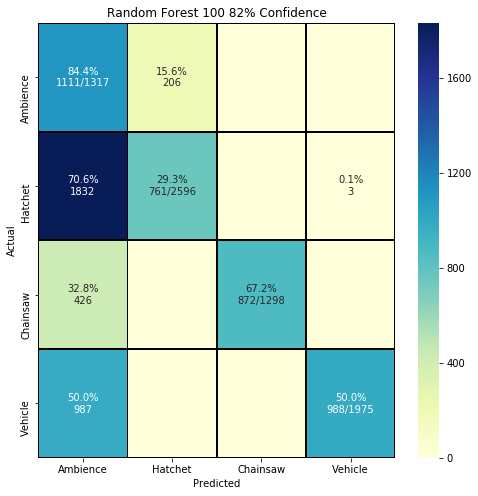

F1 Score:  0.5604863488435146
Precision Score:  0.7644492004354669
Recall Score:  0.5680704716553204


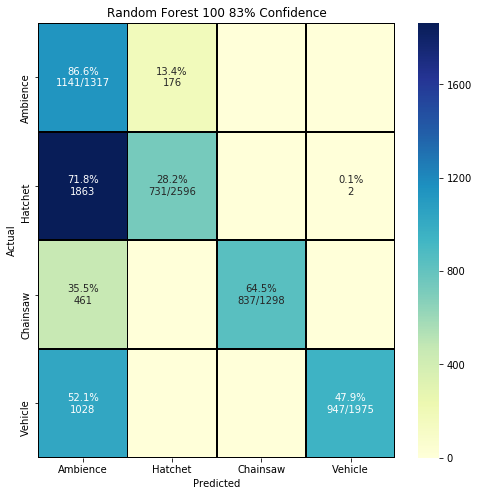

F1 Score:  0.5477978247546214
Precision Score:  0.7687725202827268
Recall Score:  0.5576740670159978


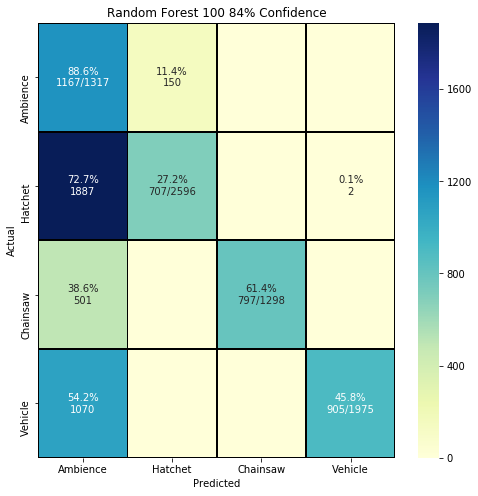

F1 Score:  0.5312030240461478
Precision Score:  0.7737115077658357
Recall Score:  0.544124223513903


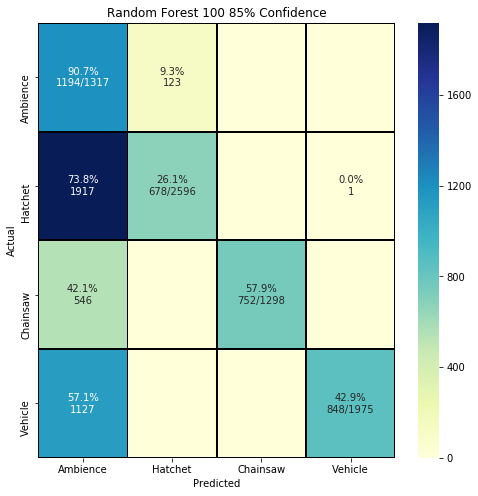

F1 Score:  0.5137166163589477
Precision Score:  0.7784468146391992
Recall Score:  0.5310229272204288


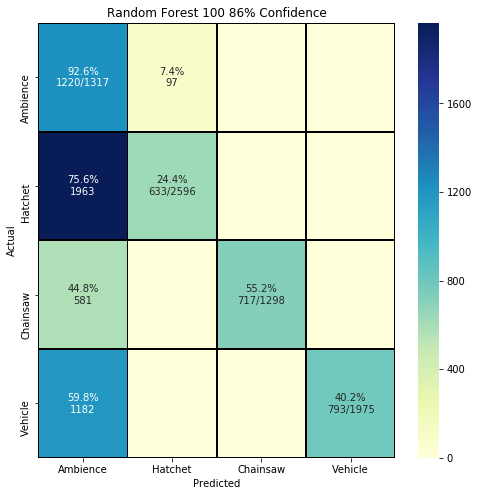

F1 Score:  0.492818902034877
Precision Score:  0.7828674969567542
Recall Score:  0.5146556987586633


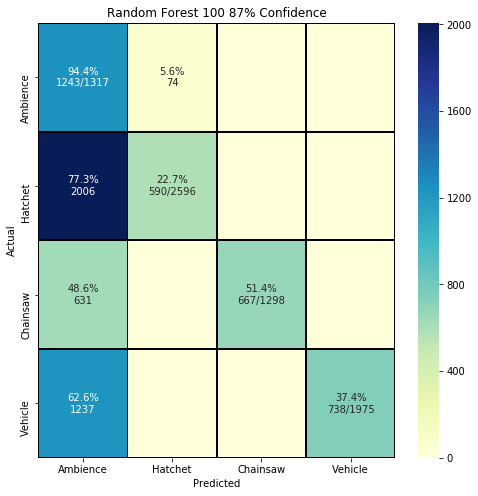

F1 Score:  0.4679284067946462
Precision Score:  0.7876799086464844
Recall Score:  0.49561117638675733


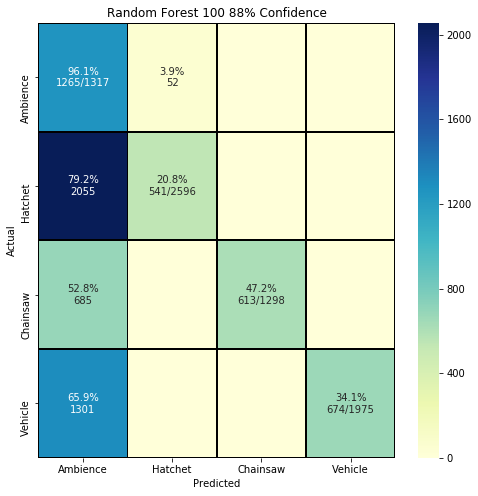

F1 Score:  0.44203887910905687
Precision Score:  0.789034201233152
Recall Score:  0.47490230315760606


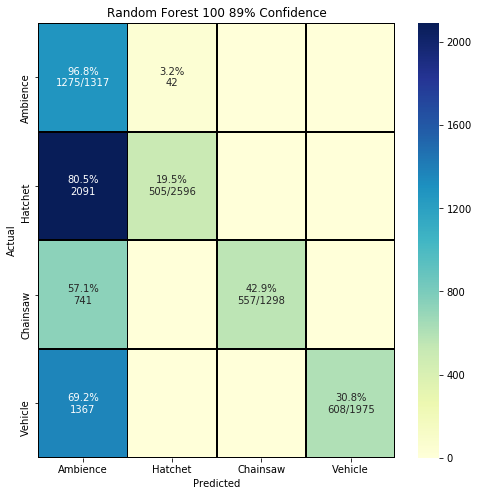

F1 Score:  0.41133776942045264
Precision Score:  0.791881761711202
Recall Score:  0.4517060610103618


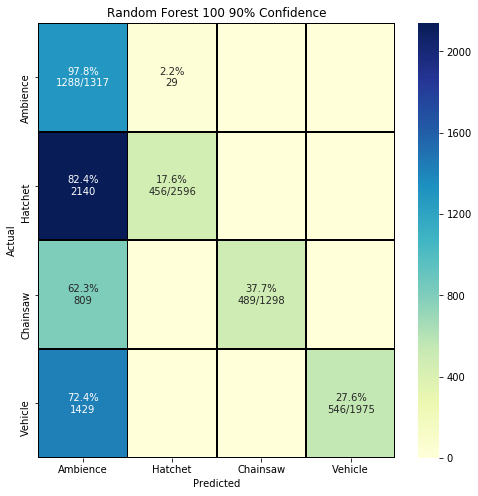

F1 Score:  0.37693406902333604
Precision Score:  0.7975247781479345
Recall Score:  0.4280279208740098


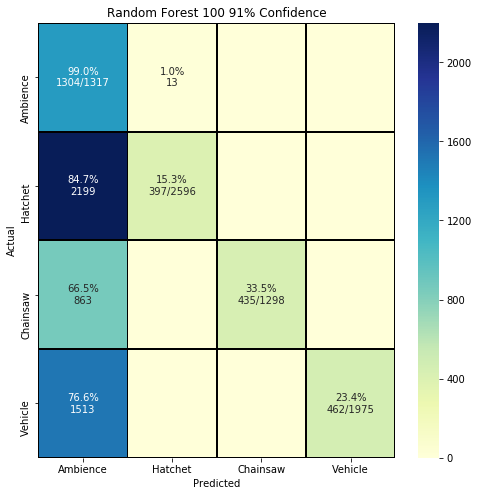

F1 Score:  0.33837732670835713
Precision Score:  0.7995303389174001
Recall Score:  0.4011804389147684


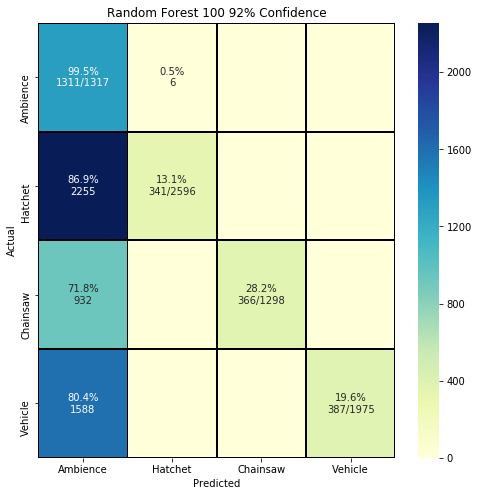

F1 Score:  0.2979548648621332
Precision Score:  0.7978557756913501
Recall Score:  0.3739644208161711


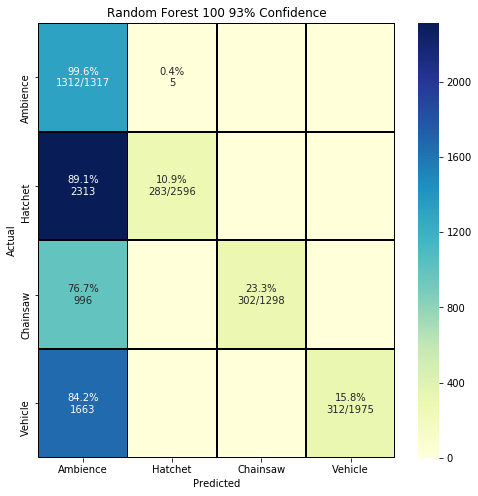

F1 Score:  0.2588927134268543
Precision Score:  0.7997505160747412
Recall Score:  0.34972542887661995


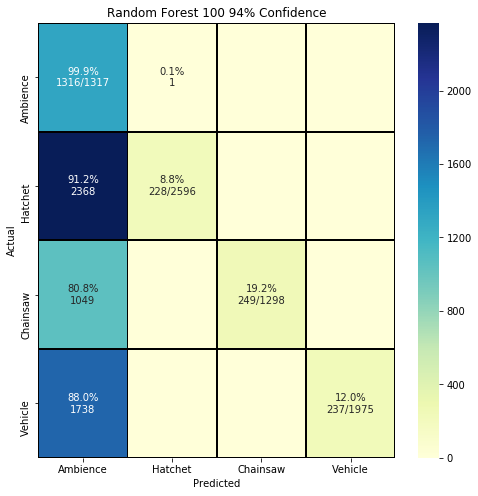

F1 Score:  0.2151236282753887
Precision Score:  0.7993998499624906
Recall Score:  0.32358809073355305


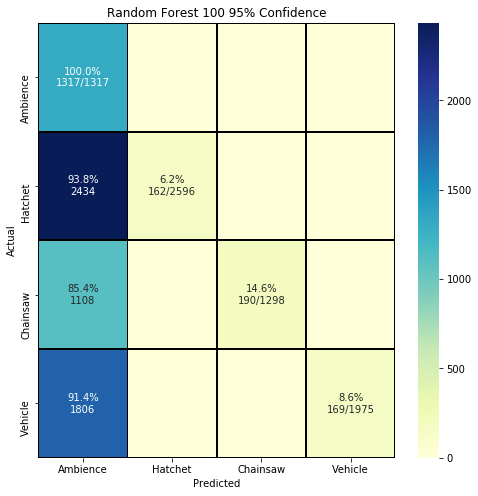

F1 Score:  0.16987826944478748
Precision Score:  0.7980727113447219
Recall Score:  0.29786355834682376


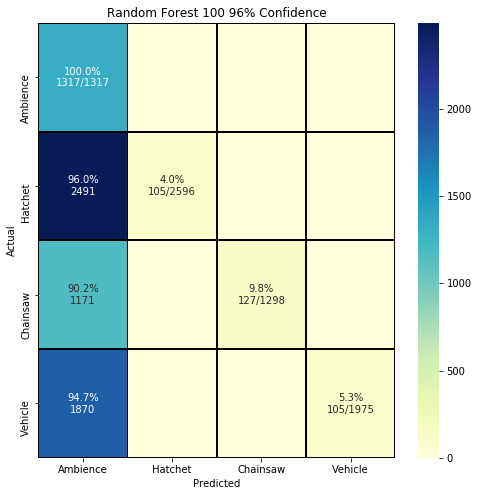

F1 Score:  0.12756997556326183
Precision Score:  0.7970222793487575
Recall Score:  0.2750613407189249


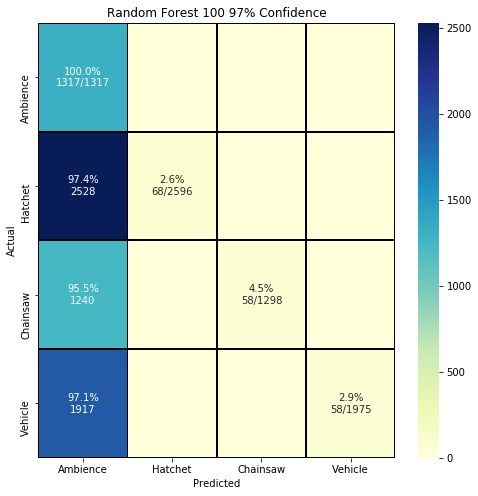

F1 Score:  0.09956193501757175
Precision Score:  0.7963210467079347
Recall Score:  0.2608741783854421


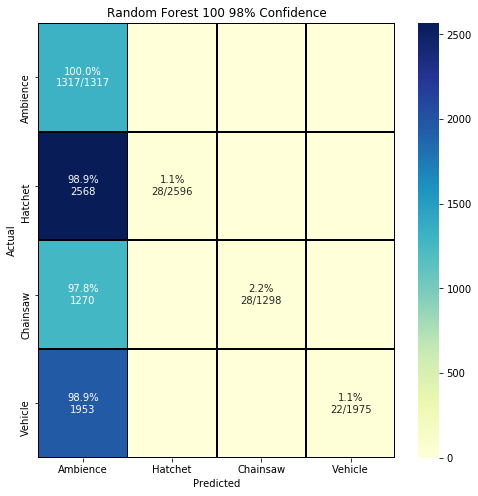

F1 Score:  0.0810781255458577
Precision Score:  0.7959012965286492
Recall Score:  0.2517637163308693


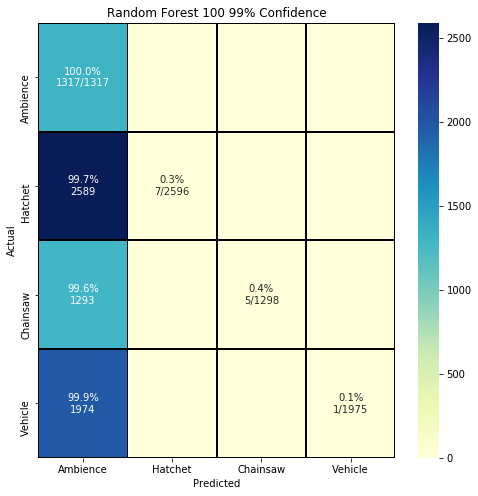

F1 Score:  0.07744325532165118
Precision Score:  0.045818257723350964
Recall Score:  0.25


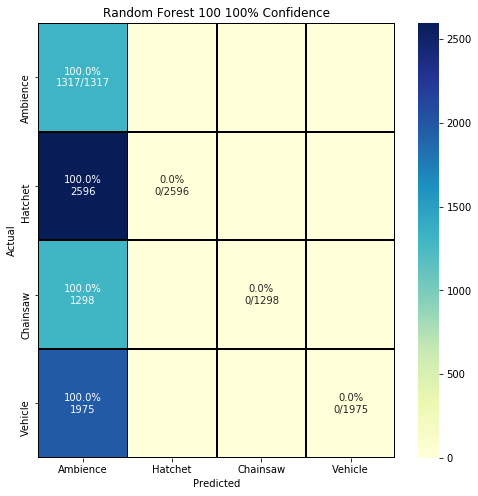

In [109]:
confidence = 0.50
step = 0.01


for i in range(50):
    ## SET CONFIDENCE LEVEL HERE 0.95 == 95% Sure Else Its Ambience
    confidence = confidence+step
    
    
    trueTarget = y_testHOT
    blankIN = np.ndarray(shape=(Py_pred.shape[0]))

    rr = Py_pred
    rr = np.round(rr,2)
    rr = np.where(rr > confidence, 1, 0)
    

    idx = 0
    for i in (rr):
        if((i == [0,0,0,0]).all()):
            #print(i)
            rr[idx] = [1,0,0,0]
            #print("Low Conficdence == NULL" , idx)
        idx += 1
    rrD = decodeRows(rr)
    trueTarget = y_test_out
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    f1 = f1_score(trueTarget, rrD, average="macro")
    ps = precision_score(trueTarget, rrD, average="macro")
    rs = recall_score(trueTarget, rrD, average="macro")
    print("F1 Score: ", f1)
    print("Precision Score: ", ps)
    print("Recall Score: ", rs)     
    customLabels = ['Ambience','Hatchet','Chainsaw','Vehicle']
    
    
    cm_analysis(y_test_out, rrD, [0,1,2,3], ymap=None, figsize=(8,8))

F1 Score:  0.07744325532165118
Precision Score:  0.045818257723350964
Recall Score:  0.25


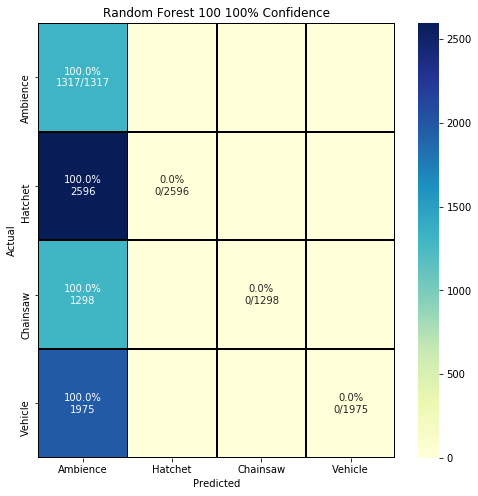

## Confidence Tweaking (Decision Filter) 

In [106]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    labels= customLabels          
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ##CUSTOMIZE GRAFTS - BORDERS THICKNESS 0,75 N COLOUR - BLACK
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="YlGnBu", linewidths=0.75, linecolor='black')
    
    plt.title("Random Forest 100 "+str(int(confidence*100)) + "% Confidence")
    plt.savefig("Random Forest"+str(int(confidence*100)))
    
    plt.show()

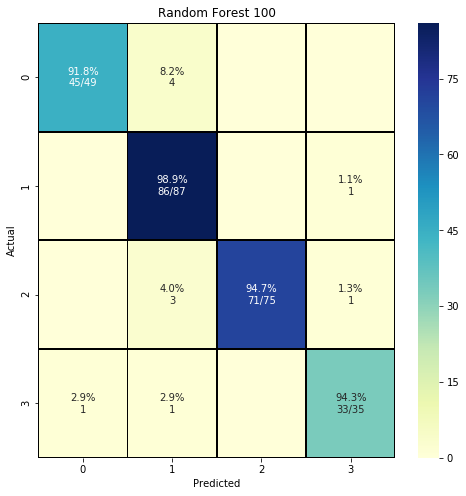

In [18]:
cm_analysis(y_test, y_pred, [0,1,2,3], ymap=None, figsize=(8,8))

## SAVE MODEL 

In [112]:
import pickle
# save the model to disk
filename = 'RandomForest100-ALL.sav'
pickle.dump(clf, open(filename, 'wb'))



In [114]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=clf.predict(X_test)
y_pred

array([0., 1., 2., 1., 1., 2., 3., 0., 0., 2., 1., 2., 1., 2., 0., 1., 0.,
       1., 3., 1., 2., 3., 1., 2., 2., 1., 2., 3., 1., 2., 0., 1., 3., 1.,
       1., 2., 1., 2., 2., 0., 1., 1., 2., 3., 0., 0., 2., 2., 1., 2., 0.,
       2., 2., 2., 3., 1., 2., 2., 1., 3., 1., 2., 2., 2., 2., 3., 3., 1.,
       2., 2., 2., 1., 2., 1., 2., 0., 1., 0., 1., 1., 1., 2., 2., 0., 3.,
       3., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 0., 1., 0., 3., 1.,
       0., 3., 2., 1., 0., 1., 3., 3., 1., 0., 1., 2., 1., 1., 1., 2., 0.,
       1., 0., 2., 2., 1., 3., 3., 0., 3., 0., 0., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 0., 2., 3., 1., 0., 1., 0., 0., 3., 0., 1., 1., 3.,
       0., 2., 1., 1., 3., 1., 1., 1., 1., 2., 2., 1., 3., 0., 0., 1., 0.,
       2., 1., 1., 0., 1., 2., 1., 0., 1., 3., 1., 3., 2., 3., 0., 0., 1.,
       0., 1., 2., 2., 1., 1., 0., 1., 3., 1., 1., 0., 2., 2., 1., 3., 1.,
       0., 2., 2., 3., 1., 1., 2., 2., 2., 1., 2., 0., 3., 1., 2., 2., 1.,
       3., 1., 1., 1., 1.

In [ ]:


import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import forestci as fci
from sklearn.datasets import make_classification

spam_X, spam_y = make_classification(5000)

# split the datainto training and test set
spam_X_train, spam_X_test, spam_y_train, spam_y_test = train_test_split(
                                                       spam_X, spam_y,
                                                       test_size=0.2)

# create RandomForestClassifier
n_trees = 500
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees,
                                  random_state=42)
spam_RFC.fit(spam_X_train, spam_y_train)
spam_y_hat = spam_RFC.predict_proba(spam_X_test)

idx_spam = np.where(spam_y_test == 1)[0]
idx_ham = np.where(spam_y_test == 0)[0]

# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
ax.hist(spam_y_hat[idx_spam, 1], histtype='step', label='spam')
ax.hist(spam_y_hat[idx_ham, 1], histtype='step', label='not spam')
ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Number of observations')
plt.legend()

# Calculate the variance
spam_V_IJ_unbiased = fci.random_forest_error(spam_RFC, spam_X_train,
                                             spam_X_test)

# Plot forest prediction for emails and standard deviation for estimates
# Blue points are spam emails; Green points are non-spam emails
fig, ax = plt.subplots(1)
ax.scatter(spam_y_hat[idx_spam, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_spam]),
           label='spam')

ax.scatter(spam_y_hat[idx_ham, 1],
           np.sqrt(spam_V_IJ_unbiased[idx_ham]),
           label='not spam')

ax.set_xlabel('Prediction (spam probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()